NOTE: PyCharm’s Jupyter is not supported when using WSL, so need to use regular Windows interpreter

In [1]:
import os
import time
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import final_project.config as c
from final_project.models.Camera import Camera
from final_project.models.Frame import Frame
from final_project.logic.Triangulation import triangulate
from final_project.logic.PnP import pnp
from final_project.logic.Ransac import RANSAC
from final_project.models.Trajectory import Axis, Trajectory
from final_project.service.InitialEstimateCalculator import IECalc

Calculating initial estimates for 100 Frames...
	Processed 90 tracking-pairs in 1 minutes
Processed all 100 Frames in 1.09 minutes


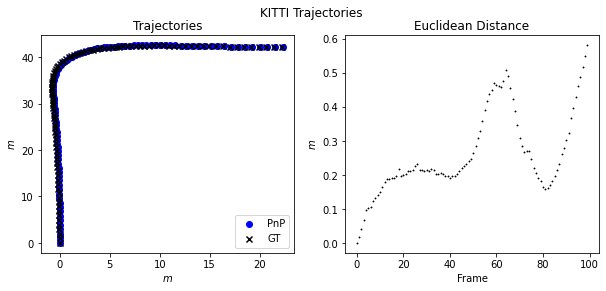

In [3]:
N = 100
mtchr = c.DEFAULT_MATCHER
iec = IECalc(matcher=mtchr)
database = iec.process(num_frames=N, verbose=True)

est_traj = Trajectory.from_relative_cameras(database.cameras)
gt_traj = Trajectory.read_ground_truth(num_frames=N)
dist = est_traj.calculate_distance(gt_traj)

fig, axes = plt.subplots(1, 2)
fig.suptitle('KITTI Trajectories')
axes[0].scatter(est_traj.X, est_traj.Z, marker="o", c='b', label="PnP")
axes[0].scatter(gt_traj.X, gt_traj.Z, marker="x", c='k', label="GT")
axes[0].set_title("Trajectories")
axes[0].set_xlabel("$m$")
axes[0].set_ylabel("$m$")
axes[0].legend(loc='best')

axes[1].scatter([i for i in range(N)], dist, c='k', marker='*', s=1)
axes[1].set_title("Euclidean Distance")
axes[1].set_xlabel("Frame")
axes[1].set_ylabel("$m$")
fig.set_figwidth(10)
plt.show()

In [7]:
mtchr = c.DEFAULT_MATCHER
left_cam0, right_cam0 = Camera.read_initial_cameras()

fr0 = Frame(0, left_cam0, matcher=mtchr)
fr1 = Frame(1, matcher=mtchr)

matched_idxs = mtchr.match_descriptors(fr0.descriptors, fr1.descriptors)
fl_pixels = np.array(fr1.features[[idx[1] for idx in matched_idxs]])
bl_pixels = np.array(fr0.features[[idx[0] for idx in matched_idxs], :2])
br_pixels = np.array(fr0.features[[idx[0] for idx in matched_idxs], 2:])
back_landmarks = triangulate(bl_pixels, br_pixels, left_cam0)
print(back_landmarks.shape, fl_pixels.shape)

r = RANSAC(back_landmarks=back_landmarks, front_features=fl_pixels, verbose=True)
idxs, cam = r.run()

(383, 3) (383, 4)
	RANSAC:	initial estimation loop
		Time:	0.02	Iterations:	7
	RANSAC:	refinement loop
		Time:	0.02	Iterations:	2


In [15]:
from typing import Dict, Tuple
d: Dict[Tuple[float, float, float, float], int] = {}
d[(0.5, 2.2, 1.1, 1.1)] = 2
d[(1,2,3,4)] = 1

arr = np.array([1,2,3,4])
d[tuple(arr)]

1

In [7]:
start = time.time()

count = np.zeros((3450,))
for i in range(3450):
    f = Frame(i)
    count[i] = f.num_features
    if i%50 == 0:
        print(i)

end = time.time()
print(end - start)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
2158.3360724449158


In [11]:
idxs = [0, 1, 500, 2456]
mtchr = c.DEFAULT_MATCHER
left_cam0, right_cam0 = Camera.read_initial_cameras()

for i in idxs:
    start = time.time()
    print(f"i={i}")
    bf = Frame(i)
    ff = Frame(i+1)
    matches = mtchr.match(bf.features, bf.descriptors, ff.features, ff.descriptors)
    back_features = bf.features[[m.queryIdx for m in matches]]
    front_features = ff.features[[m.trainIdx for m in matches]]
    print(back_features.shape)
    print(front_features.shape)

i=0


AttributeError: 'numpy.ndarray' object has no attribute 'pt'